# Telco_Churn EDA – Foundation Level
**Course:** AI Certificate – Foundation  
**Modules:** AI Introductory, Programming Foundations for AI, Applied Programming for AI  
**Objective:** Perform exploratory data analysis (EDA) and visualize the Telcho_Churn dataset to understand customer churn patterns.  
**Skills:** Data cleaning, visualization, basic insights extraction using Python.



# Step 1: Import libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style='whitegrid')

# Step 2: Load the Dataset

In [2]:
data=pd.read_csv('Telco-Churn.csv')
data.head() # Displays the first 5 rows

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Basic Information about the Dataset
- Dataest shape
- columns and types
- check missing values

In [26]:
print('Dataset shape:',data.shape)
print('Columns and data types:/n',data.dtypes)
print('Missing values:/n',data.isnull().sum())

Dataset shape: (7043, 21)
Columns and data types:/n customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object
Missing values:/n customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     

# Step 3.1: Churn Distribution
- Understand how many customers Churn vs stay

C:\Users\HP\AppData\Local\Temp\ipykernel_12612\1825959620.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Churn',data=data,palette='rocket')


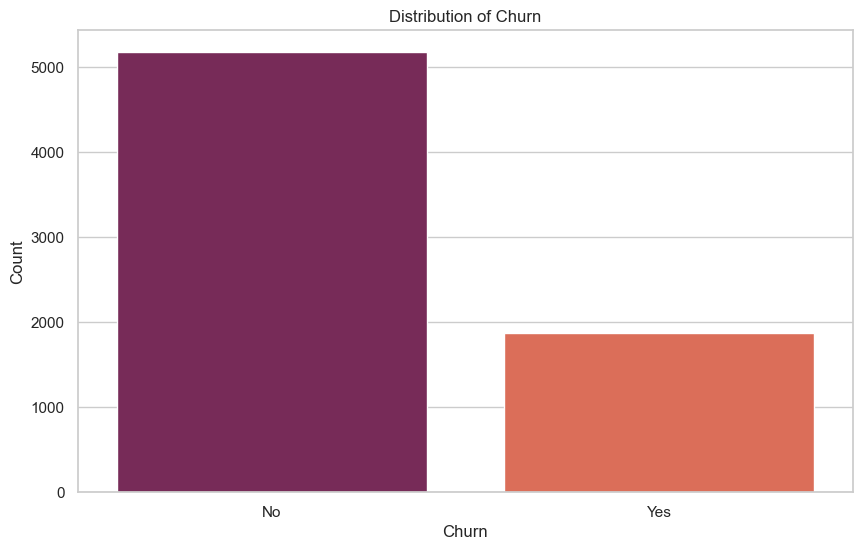

In [5]:
plt.figure(figsize=(10,6))
sns.countplot(x='Churn',data=data,palette='rocket')
plt.title('Distribution of Churn')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()

In [13]:
churn_rate = data['Churn'].value_counts(normalize=True)*100 
churn_rate

Churn
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64

# Observation
- Most customers are 'No' Churn.This shows class imbalance

# step 3.2: Gender Distribution
- Check male vs female distribution

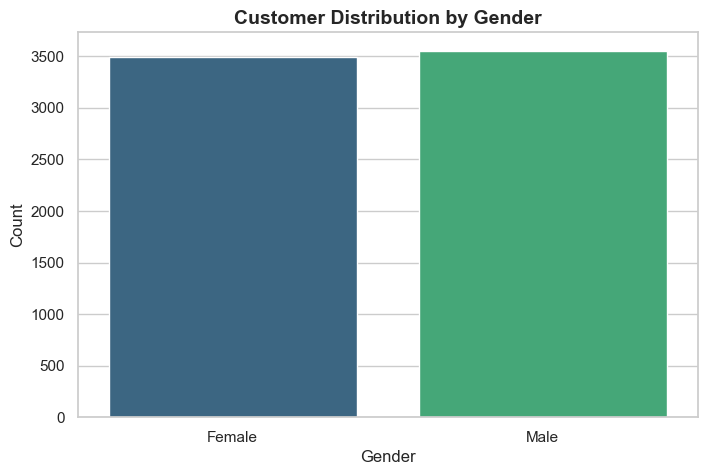

In [28]:
plt.figure(figsize=(8, 5))
ax = sns.countplot(x='gender', data=data, palette='viridis',hue='gender')
plt.title('Customer Distribution by Gender', fontsize=14, fontweight='bold')
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

# Observation
- The dataset has almost equal male and female customers
- Male customers are slightly higher than female customers 

# Step 3.3: Senior Citizen Distribution
- How many senior citizens are there?

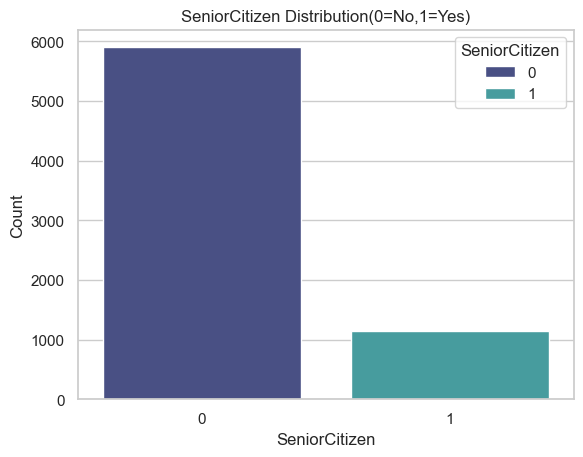

In [29]:
plt.figure()
sns.countplot(x='SeniorCitizen',data=data,palette='mako',hue='SeniorCitizen')
plt.xlabel('SeniorCitizen')
plt.ylabel('Count')
plt.title('SeniorCitizen Distribution(0=No,1=Yes)')
plt.show()

# Observations
- Most customers are not senior citizens

# Step 3.4: Tenure Distribution 
- Distribution of Tenure

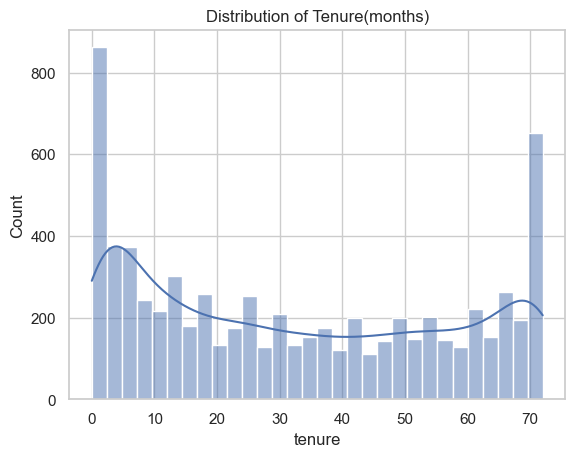

In [30]:
plt.figure()
sns.histplot(data['tenure'],bins=30,kde=True)
plt.title('Distribution of Tenure(months)')
plt.show()

# Observations
- In (0 to 5) months,there are very low tenure values meaning many customers leave shortly after joining
- In (10 to 40) months,there are fewer customers showing that not many stay for medium durations
- In 70 months,there is an increase in high tenure values which represents long_term loyal customers
- So that means the customers that stay longer tend to remain in the company for years

# Step 3.5: MonthlyCharges Distribution

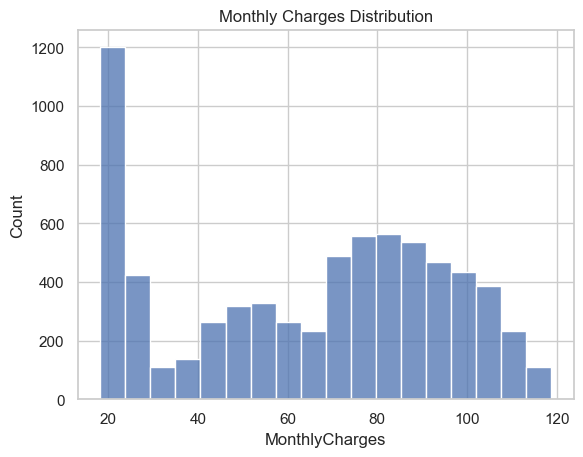

In [23]:
sns.histplot(x='MonthlyCharges',data=data)
plt.title('Monthly Charges Distribution')
plt.show()

# Observation
- Many customers pay lower monthly charges with a big spike around the 20-25 range
- Most customers pay average or lower fees than very high ones

Step 3.6:Total Charges Distributions
- Convert Total Charges to numeric

<Axes: xlabel='TotalCharges', ylabel='Count'>

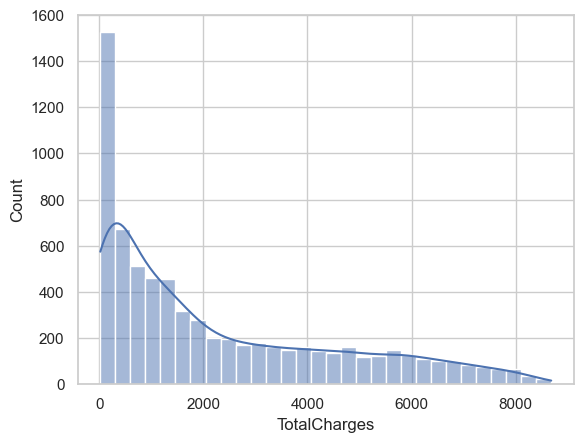

In [32]:
data['TotalCharges']=pd.to_numeric(data['TotalCharges'],errors='coerce')
plt.figure()
sns.histplot(data['TotalCharges'].dropna(),bins=30,kde=True)

# Observation
- Most customers have very low low total charges which makes sense because many have short tenure
- Only small number of customers have very high totals indicating long term users

# Step 3.7:Churn by contract type
- Check churn across diffrent contract types

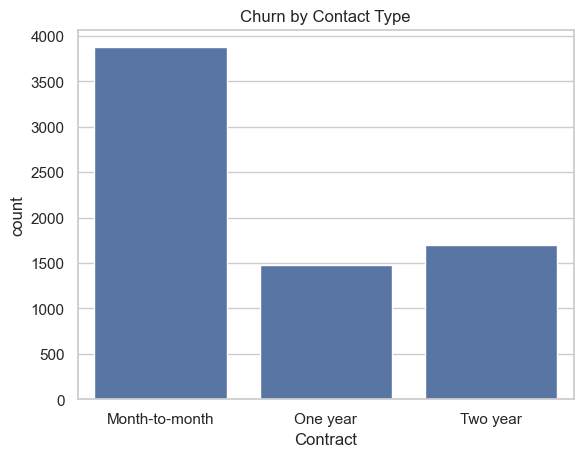

In [3]:
plt.figure()
sns.countplot(x='Contract',data=data)
plt.title('Churn by Contact Type')
plt.show()

# Observation
- Customers with month-to-month churn more than the one year contract and Two year

# Step 3.8: Correlation heatmap(numerical features)

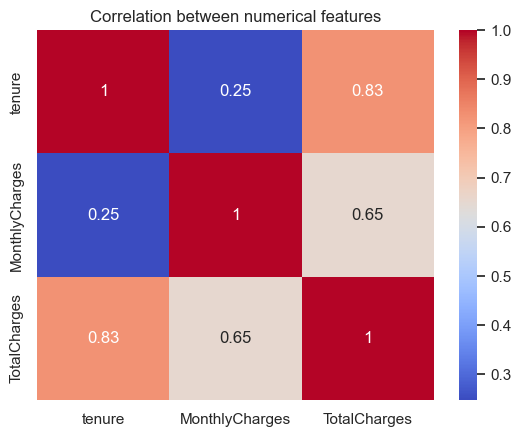

In [34]:
numerical_columns=['tenure','MonthlyCharges','TotalCharges']
plt.figure()
sns.heatmap(data[numerical_columns].corr(),annot=True,cmap='coolwarm')
plt.title('Correlation between numerical features')
plt.show()

# Observation
- MonthlyCharges and TotalCharges are positively correlated with tenure

# Step 3.9: Payment Method VS Churn

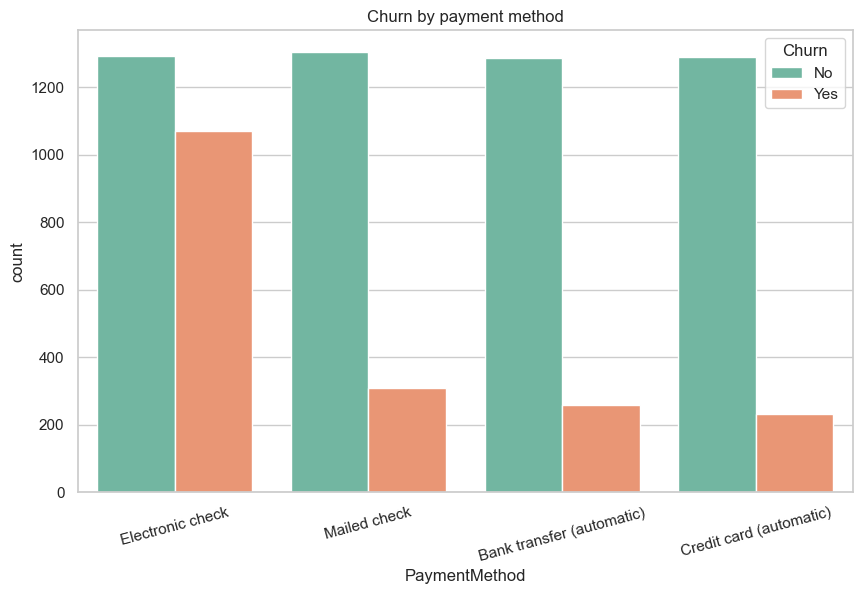

In [19]:
plt.figure(figsize=(10,6))
sns.countplot(x='PaymentMethod',hue='Churn',data=data,palette='Set2')
plt.title('Churn by payment method')
plt.xticks(rotation=15)
plt.show()

# Observation – Payment Method vs Churn
- Customers who pay by Electric Check Churn most
- Customers who pay by Bank transfer (automatic) or Credit Card(automatic) almost never Churn

# Key Insights Summary

- Most customers churn within the first few months of joining.
- Customers with month-to-month contracts show the highest churn rate.
- Higher Monthly Charges are associated with higher churn.
- Long-term customers (high tenure) rarely churn, showing strong loyalty.
- Total charges are strongly related to tenure, meaning customers who stay longer pay more overall.


# Conclusion

This exploratory analysis helped uncover important patterns about customer behavior. 
- Customers with short tenure, higher monthly charges, and month-to-month contracts are more likely to churn. 
- The business could focus on improving early customer experience, offering better pricing,and encouraging longer-term contracts to reduce churn. 
- This project covered beginner-level EDA skills using pandas, seaborn, and matplotlib—without any machine learning.
